In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

In [3]:
#Percentuálny podiel: Yuová 50%, Rafaj 50%
# Bod 1
# načítanie datasetv zo súborov
profiles_filename = "profiles.csv"
labor_filename = "labor.csv"

df_profiles = pd.read_csv(profiles_filename, sep='\t', index_col=0)
df_labor = pd.read_csv(labor_filename, sep='\t', index_col=0)

df_labor.head()      #cela tabulka
df_profiles.head()

,blood_group,name,race,job,residence,birthdate,current_location,ssn,sex
0,A+,Robert Johnson,White,Chartered management accountant,"046 Henderson Place\nNorth Kenneth, LA 18909",1992/06/21,"(Decimal('-74.632626'), Decimal('61.437006'))",111-66-4780,M
1,O-,Billy Brown,Hawaiian,"Designer, furniture","5168 Craig Crossing\nNorth Danielbury, OK 44116",21 Aug 2012,"(Decimal('44.5509005'), Decimal('159.093037'))",715-26-6538,M
2,B+,William Evans,White,Occupational psychologist,"1102 Crystal Path\nPort Janiceberg, VA 52575",03 Apr 2009,"(Decimal('-42.592953'), Decimal('9.116989'))",880-21-4333,M
3,AB+,Mark Anderson,White,Leisure centre manager,"0345 Christensen Burg\nEast Angelaburgh, MN 32243",1968/10/14,"(Decimal('-72.110798'), Decimal('37.607451'))",452-97-8425,M
4,O+,Ashley Archer,Indian,Animal technologist,"351 Margaret Hollow Suite 435\nLake John, TX 9...",01 Jul 1950,"(Decimal('-82.533703'), Decimal('126.463182'))",084-71-0177,F


In [4]:
# Bod 1
# počet záznamov
df_profiles.count()
df_labor.count()       

hbver            9997
ssn             10028
er-cv            9996
hematokrit       9998
etytr            9997
indicator       10028
name            10028
leukocyty        9998
erytrocyty       9997
smoker          10028
weight          10028
trombocyty       9997
relationship    10028
hemoglobin       9998
alt              9997
ast              9998
alp              9998
dtype: int64

In [5]:
# Bod 1
# počet atribútov
df_profiles.shape[1] 
df_labor.shape[1]       

17

In [6]:
# Bod 1
# ich typy
df_profiles.dtypes
df_labor.dtypes    

hbver           float64
ssn              object
er-cv           float64
hematokrit      float64
etytr           float64
indicator       float64
name             object
leukocyty       float64
erytrocyty      float64
smoker           object
weight          float64
trombocyty      float64
relationship     object
hemoglobin      float64
alt             float64
ast             float64
alp             float64
dtype: object

In [7]:
# Bod 1
# nájdenie nulových riadkov
df_labor.isnull().sum()               #koľko je null pod%la atribútov
df_labor.isnull().sum().sum()         #koľko je null celkovo
df_labor[df_labor.isnull().any(axis=1)]  #zobraz riadky s 1 a viac null hodnotami

df_profiles.isnull().sum()            #pre dataset profiles je to 0    

blood_group         0
name                0
race                0
job                 0
residence           0
birthdate           0
current_location    0
ssn                 0
sex                 0
dtype: int64

In [8]:
# Bod 1
# základné deskriptívne štatistiky pre dataset labor
df_labor.shape        #prvý údaj = riadky, druhý údaj = stĺpce

df_labor.info()

df_labor.describe()

df_labor.relationship.unique()
df_labor['relationship'].unique()
df_labor.groupby('relationship').size()
df_labor['smoker'].unique()
df_labor.groupby('smoker').size()

df_labor.indicator.unique()
df_labor.groupby('indicator').size()

df_labor['weight'].mean()
df_labor['hematokrit'].mean()
df_labor['erytrocyty'].median()
df_labor['trombocyty'].median()

stats.mode(df_labor['hematokrit'])

np.var(df_labor['trombocyty'])
np.std(df_labor['erytrocyty'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10028 entries, 0 to 10027
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hbver         9997 non-null   float64
 1   ssn           10028 non-null  object 
 2   er-cv         9996 non-null   float64
 3   hematokrit    9998 non-null   float64
 4   etytr         9997 non-null   float64
 5   indicator     10028 non-null  float64
 6   name          10028 non-null  object 
 7   leukocyty     9998 non-null   float64
 8   erytrocyty    9997 non-null   float64
 9   smoker        10028 non-null  object 
 10  weight        10028 non-null  float64
 11  trombocyty    9997 non-null   float64
 12  relationship  10028 non-null  object 
 13  hemoglobin    9998 non-null   float64
 14  alt           9997 non-null   float64
 15  ast           9998 non-null   float64
 16  alp           9998 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


1.516792117231509

In [9]:
# Bod 1
# základné deskriptívne štatistiky pre dataset profiles
df_profiles.shape 

df_profiles.info()

df_profiles.describe()

df_profiles.race.unique()
df_profiles.blood_group.unique()
df_profiles.sex.unique()


df_profiles.groupby('sex').size()
df_profiles.groupby('blood_group').size()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071 entries, 0 to 3070
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   blood_group       3071 non-null   object
 1   name              3071 non-null   object
 2   race              3071 non-null   object
 3   job               3071 non-null   object
 4   residence         3071 non-null   object
 5   birthdate         3071 non-null   object
 6   current_location  3071 non-null   object
 7   ssn               3071 non-null   object
 8   sex               3071 non-null   object
dtypes: object(9)
memory usage: 239.9+ KB


blood_group
A+     424
A-     352
AB+    390
AB-    410
B+     351
B-     404
O+     369
O-     371
dtype: int64

<AxesSubplot:>

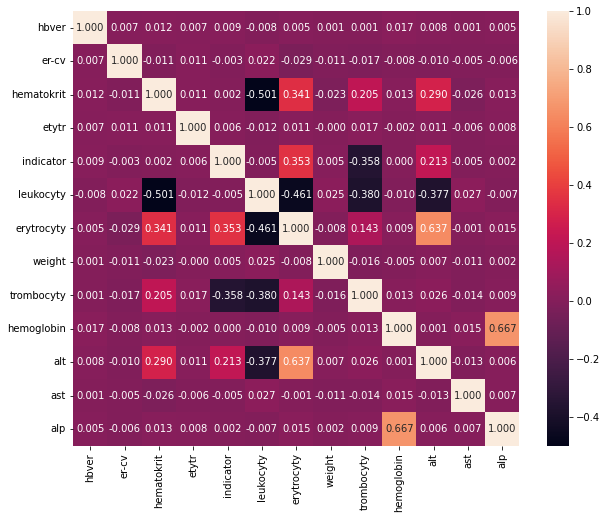

In [10]:
# Bod 2
# vzťahy medzi dvojicami atribútov
# pomocou heat mapy sme našli korelácie medzi atribútmi
# ak je to 1, tak sú rovnaké
# čím je číslo bližšie k 0, tým menej spolu súvisia
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_labor.corr(), ax=ax, annot=True, fmt=".3f")

In [ ]:
# Bod 2
# z prechádzajúceho grafu sme zistili, že spolu súvisia hemoglobín a alp
# hemoglobín a alp spolu korelujú, s meniacim sa hemoglobínom sa mení aj alp (hodnota je 0,667)
sns.boxplot(data=df_labor,x="hemoglobin", y="alp")

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

In [37]:
# Bod 2
# hemoglobín a alt spolu nekorelujú (hodnota je 0,001)
sns.boxplot(data=df_labor,x="hemoglobin", y="alt")

In [ ]:
# Bod 2
# ľudia s indikátorom 1 majú vyššie erytrocyty, váha ostáva rovnaká
sns.relplot(data=df_labor,x="erytrocyty", y="weight", col="indicator",)

In [ ]:
# Bod 2
# ľudia s indikátorom 0 majú v priemere vyššie trombocyty, málokedy pod 5, pričom u 1 je bežne od 2.5 do 8.5 (viď graf)
# hemoglobín ostáva rovnaký
sns.relplot(data=df_labor,x="trombocyty", y="hemoglobin", col="indicator",)

In [ ]:
# Bod 3 - 1. hypotéza 
# erytrocyty pri indikátore 1 sú vyššie ako pri indikátore 0
sns.boxplot(data=df_labor,x="indicator", y="erytrocyty")

In [ ]:
# Bod 3 - 2. hypotéza 
# trombocyty pri indikátore 0 sú vyššie ako pri indikátore 1
sns.boxplot(data=df_labor,x="indicator", y="trombocyty")

<AxesSubplot:xlabel='trombocyty', ylabel='Count'>

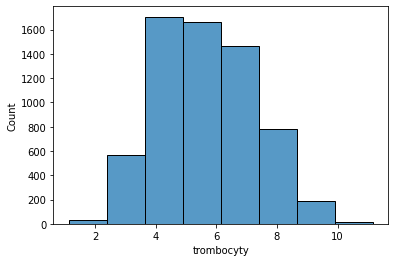

In [11]:
# Bod 3 - testovanie 1.hypotézy
df_test = df_labor[df_labor['indicator'] ==1]
sns.histplot(df_test['trombocyty'], bins=8)

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


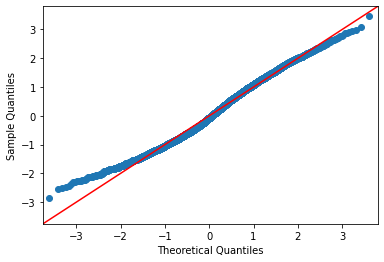

In [12]:
# Bod 3 - testovanie 1.hypotézy QQ graf
df_test = df_labor[df_labor['indicator']==1]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["trombocyty"], inplace=True)
_ = sm.ProbPlot(df_test['trombocyty'], fit=True).qqplot(line='45')

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


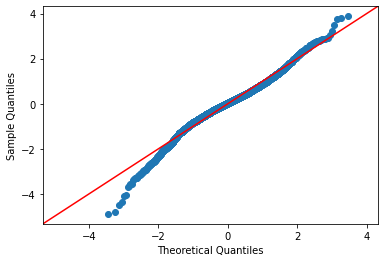

In [14]:
# Bod 3 - testovanie 1.hypotézy QQ graf
df_test = df_labor[df_labor['indicator']==0]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["trombocyty"], inplace=True)

_ = sm.ProbPlot(df_test['trombocyty'], fit=True).qqplot(line='45')

In [15]:
# Bod 3 - testovanie 1.hypotézy Shapiro testom
df_test = df_labor[df_labor['indicator']==1]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["trombocyty"], inplace=True)

stats.shapiro(df_test["trombocyty"])

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9883894324302673, pvalue=1.4620143434368471e-22)

In [18]:
# Bod 3 - testovanie hypotézy Shapiro testom
df_test = df_labor[df_labor['indicator']==0]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["trombocyty"], inplace=True)

stats.shapiro(df_test["trombocyty"])

ShapiroResult(statistic=0.9800799489021301, pvalue=5.054150283087859e-22)

In [20]:
# Bod 3 - testovanie 1.hypotézy Levenov test
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

a_sample = df_labor[df_labor['indicator']==1]
na_sample = df_labor[df_labor['indicator']==0]

c_d = cohen_d(a_sample["trombocyty"], na_sample["trombocyty"])
c_d

0.8006363851114492

<AxesSubplot:xlabel='erytrocyty', ylabel='Count'>

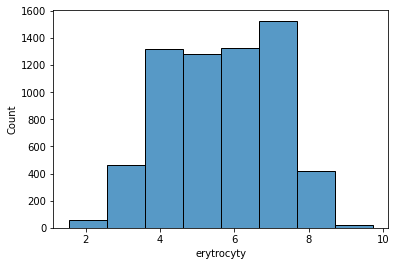

In [22]:
# Bod 3 - testovanie 2.hypotézy
df_test = df_labor[df_labor['indicator'] ==1]
sns.histplot(df_test['erytrocyty'], bins=8)

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


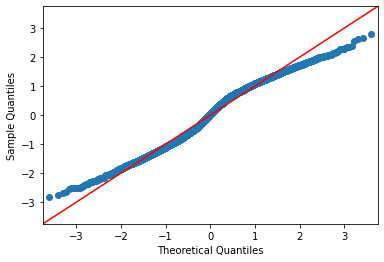

In [24]:
# Bod 3 - testovanie 2.hypotézy QQ graf
df_test = df_labor[df_labor['indicator']==1]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["erytrocyty"], inplace=True)
_ = sm.ProbPlot(df_test['erytrocyty'], fit=True).qqplot(line='45')

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


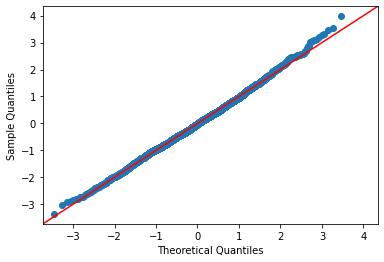

In [25]:
# Bod 3 - testovanie 2.hypotézy QQ graf
df_test = df_labor[df_labor['indicator']==0]
nan_value = float("NaN")

df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["erytrocyty"], inplace=True)

_ = sm.ProbPlot(df_test['erytrocyty'], fit=True).qqplot(line='45')

In [26]:
# Bod 3 - testovanie 2.hypotézy Shapiro testom
df_test = df_labor[df_labor['indicator']==1]

nan_value = float("NaN")
df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["erytrocyty"], inplace=True)

stats.shapiro(df_test["erytrocyty"])

C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Anna\Documents\GitHub\2021-2022\cvicenia\env\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9786615371704102, pvalue=5.823477254877603e-30)

In [27]:
# Bod 3 - testovanie 2.hypotézy Shapiro testom
df_test = df_labor[df_labor['indicator']==0]

nan_value = float("NaN")
df_test.replace("", nan_value, inplace=True)
df_test.dropna(subset = ["erytrocyty"], inplace=True)

stats.shapiro(df_test["erytrocyty"])

ShapiroResult(statistic=0.9984318614006042, pvalue=0.0014398895436897874)

In [28]:
# Bod 3 - testovanie 2.hypotézy Levenov test
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

a_sample = df_labor[df_labor['indicator']==1]
na_sample = df_labor[df_labor['indicator']==0]

c_d = cohen_d(a_sample["erytrocyty"], na_sample["erytrocyty"])
c_d

0.7858041834328016

In [30]:
# Bod 4
# váha mala záporné hodnoty, pomocou absolútnej hodnoty sme ich zmenili na kladné
df_labor['weight'].where(df_labor['weight'] < 0).count()      # počet zlých údajov váhy (254)
df_labor['weight'] = df_labor['weight'].abs()              # všetky hodnoty v stĺpci budú v absolútnej hodnote
df_labor['weight'].where(df_labor['weight'] < 0).count()      # nový počet záporných údajov (0)
df_labor.head()

,hbver,ssn,er-cv,hematokrit,etytr,indicator,name,leukocyty,erytrocyty,smoker,weight,trombocyty,relationship,hemoglobin,alt,ast,alp
0,4.89113,159-78-0958,35.81178,7.15477,6.16679,0.0,Alexander Brown,5.55642,3.12928,Y,132.34095,6.05807,widowed,5.92487,9.17194,59.28478,82.02970
1,5.03413,317-49-1498,58.69978,7.70810,5.93774,1.0,William Molina,5.09166,7.11909,no,124.26988,6.36438,single,5.94249,11.69650,45.83987,83.19304
2,4.71736,848-81-8762,61.92180,5.55008,6.10185,1.0,Paula Richardson,3.14271,6.88146,yes,20.37838,8.23852,divoced,5.86043,15.38632,68.50540,76.88515
3,4.71445,045-41-6015,38.65775,4.25821,7.57766,1.0,Stacey Chen,5.77017,4.38533,no,156.35307,4.26855,divoced,6.10489,8.51677,52.30253,87.88611
4,6.44980,856-39-5109,51.56507,5.34580,5.64402,0.0,Bailey Jackson,7.12557,5.72449,yes,104.21790,6.52931,divoced,5.00430,8.19195,78.49148,60.20941


In [31]:
# Bod 4
# údaje o fajčiaroch mali nejednotný formát, Y a N sme nahrali, aby nám ostali iba yes a no
df_labor['smoker'].unique()                                         # nejednotny format 
df_labor['smoker'].replace({"Y": "yes", "N": "no"}, inplace=True)   # nahradenie Y = yes, N = no
df_labor['smoker'].unique()                                         # formát je už po novom iba yes a no
df_labor.head()

,hbver,ssn,er-cv,hematokrit,etytr,indicator,name,leukocyty,erytrocyty,smoker,weight,trombocyty,relationship,hemoglobin,alt,ast,alp
0,4.89113,159-78-0958,35.81178,7.15477,6.16679,0.0,Alexander Brown,5.55642,3.12928,yes,132.34095,6.05807,widowed,5.92487,9.17194,59.28478,82.02970
1,5.03413,317-49-1498,58.69978,7.70810,5.93774,1.0,William Molina,5.09166,7.11909,no,124.26988,6.36438,single,5.94249,11.69650,45.83987,83.19304
2,4.71736,848-81-8762,61.92180,5.55008,6.10185,1.0,Paula Richardson,3.14271,6.88146,yes,20.37838,8.23852,divoced,5.86043,15.38632,68.50540,76.88515
3,4.71445,045-41-6015,38.65775,4.25821,7.57766,1.0,Stacey Chen,5.77017,4.38533,no,156.35307,4.26855,divoced,6.10489,8.51677,52.30253,87.88611
4,6.44980,856-39-5109,51.56507,5.34580,5.64402,0.0,Bailey Jackson,7.12557,5.72449,yes,104.21790,6.52931,divoced,5.00430,8.19195,78.49148,60.20941


In [32]:
# Bod 4
# údaje o vzťahoch mali chybu, divoced sme nahradili divorced
df_labor['relationship'].unique()                                         # gramatická chyba v slove divorced chýba r
df_labor['relationship'].replace({"divoced": "divorced"}, inplace=True)   # nahradenie divoced = divorced
df_labor['relationship'].unique()
df_labor.head()

,hbver,ssn,er-cv,hematokrit,etytr,indicator,name,leukocyty,erytrocyty,smoker,weight,trombocyty,relationship,hemoglobin,alt,ast,alp
0,4.89113,159-78-0958,35.81178,7.15477,6.16679,0.0,Alexander Brown,5.55642,3.12928,yes,132.34095,6.05807,widowed,5.92487,9.17194,59.28478,82.02970
1,5.03413,317-49-1498,58.69978,7.70810,5.93774,1.0,William Molina,5.09166,7.11909,no,124.26988,6.36438,single,5.94249,11.69650,45.83987,83.19304
2,4.71736,848-81-8762,61.92180,5.55008,6.10185,1.0,Paula Richardson,3.14271,6.88146,yes,20.37838,8.23852,divorced,5.86043,15.38632,68.50540,76.88515
3,4.71445,045-41-6015,38.65775,4.25821,7.57766,1.0,Stacey Chen,5.77017,4.38533,no,156.35307,4.26855,divorced,6.10489,8.51677,52.30253,87.88611
4,6.44980,856-39-5109,51.56507,5.34580,5.64402,0.0,Bailey Jackson,7.12557,5.72449,yes,104.21790,6.52931,divorced,5.00430,8.19195,78.49148,60.20941


In [34]:
# Bod 4
# údaje o vzťahoch mali chybu, divoced sme nahradili divorced
df_labor.shape[0] - df_labor.dropna().shape[0]              # nájdenie prázdnych políčok

335

In [38]:
# Bod 4
# duplikáty sme našli podľa ssn, nechali sme si prvý záznam ssn a ostatné sme zmazali
df_labor[df_labor['ssn'].duplicated() == True]          # duplikátni ľudia podľa SSN
df_profiles[df_profiles['ssn'].duplicated() == True]    #ziadne duplikaty 

,blood_group,name,race,job,residence,birthdate,current_location,ssn,sex


In [40]:
# Bod 4
# údaje o rase mali nejednotný formát
df_profiles['race'].unique()                                                                       # nejednotny format 
df_profiles['race'].replace({"white": "White", "blsck": "Black", "black": "Black"}, inplace=True)  # nahradenie
df_profiles['race'].unique()  

array(['White', 'Hawaiian', 'Indian', 'Black', 'Asian'], dtype=object)

In [41]:
# Bod 4
df_profiles['birthdate'].unique() # nejednotny format datumov v tabulke profiles

array(['1992/06/21', '21 Aug 2012', '03 Apr 2009', ..., '1913/06/29',
       '1991/01/15', '1934/12/04'], dtype=object)

In [5]:
# Bod 4
df_profiles['birthdate'] = pd.to_datetime(df_profiles['birthdate']) # nahradenie do jednotného formátu rok-mesiac-deň
df_profiles

,blood_group,name,race,job,residence,birthdate,current_location,ssn,sex
0,A+,Robert Johnson,White,Chartered management accountant,"046 Henderson Place\nNorth Kenneth, LA 18909",1992-06-21,"(Decimal('-74.632626'), Decimal('61.437006'))",111-66-4780,M
1,O-,Billy Brown,Hawaiian,"Designer, furniture","5168 Craig Crossing\nNorth Danielbury, OK 44116",2012-08-21,"(Decimal('44.5509005'), Decimal('159.093037'))",715-26-6538,M
2,B+,William Evans,White,Occupational psychologist,"1102 Crystal Path\nPort Janiceberg, VA 52575",2009-04-03,"(Decimal('-42.592953'), Decimal('9.116989'))",880-21-4333,M
3,AB+,Mark Anderson,White,Leisure centre manager,"0345 Christensen Burg\nEast Angelaburgh, MN 32243",1968-10-14,"(Decimal('-72.110798'), Decimal('37.607451'))",452-97-8425,M
4,O+,Ashley Archer,Indian,Animal technologist,"351 Margaret Hollow Suite 435\nLake John, TX 9...",1950-07-01,"(Decimal('-82.533703'), Decimal('126.463182'))",084-71-0177,F
...,...,...,...,...,...,...,...,...,...
3066,AB+,Matthew Wells,White,"Doctor, hospital","94655 Pham Plaza\nLake Michelle, CA 13327",1962-02-16,"(Decimal('-35.1440845'), Decimal('-81.001847'))",758-39-9185,M
3067,A-,Scott Johnson,White,"Scientist, marine",USNS Daniel\nFPO AP 81211,1962-10-26,"(Decimal('21.1746695'), Decimal('40.825483'))",734-08-3664,M
3068,O+,Mark Brewer,White,"Engineer, petroleum","81515 Barnes Turnpike\nPamelashire, CT 39870",1913-06-29,"(Decimal('27.397744'), Decimal('72.045727'))",863-77-5143,M
3069,O-,Sally Ramirez,Black,Private music teacher,"849 Flynn Rapids\nPort Zacharyton, OK 90482",1991-01-15,"(Decimal('32.3213215'), Decimal('-37.111459'))",464-82-1651,F
